In [1]:
import os
import warnings
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
new_model = tf.keras.models.load_model('saved_model/08_30_model')

In [3]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 50048)             0

In [5]:
1./255

0.00392156862745098

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [118]:
validation_generator = test_datagen.flow_from_directory(
        './test',
        target_size=(200, 150),
        batch_size=10,
        class_mode='binary')

Found 67 images belonging to 2 classes.


In [119]:
tmp = new_model.predict(validation_generator)

In [120]:
new_model.evaluate(validation_generator)

  ...
    to  
  ['...']
7/7 [==============================] - 1s 78ms/step - loss: 0.8639 - acc: 0.7463


[0.8638795662139144, 0.74626863]

In [122]:
for i in tmp:
    if (i < 0.5):
        print("indoor")
    else:
        print("outdoor")

outdoor
indoor
indoor
indoor
indoor
outdoor
outdoor
outdoor
indoor
outdoor
outdoor
indoor
indoor
indoor
outdoor
outdoor
indoor
indoor
outdoor
indoor
indoor
outdoor
indoor
indoor
indoor
outdoor
outdoor
outdoor
indoor
indoor
outdoor
indoor
outdoor
indoor
outdoor
outdoor
outdoor
indoor
indoor
outdoor
outdoor
indoor
outdoor
indoor
outdoor
indoor
outdoor
indoor
indoor
outdoor
outdoor
outdoor
outdoor
indoor
indoor
outdoor
indoor
indoor
outdoor
outdoor
indoor
outdoor
indoor
outdoor
indoor
outdoor
indoor


In [117]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [273]:
np_img = np.array(Image.open('./test/mix/images-1.jpg'))
print(np_img.shape)
img = (np.expand_dims(tf.image.resize(np_img, [200, 150]), 0))
prediction_result = ''
print(img.shape)
predictions_single = new_model.predict(img)
if predictions_single[0][0] == 0.0:
    prediction_result = "indoor"
else:
    prediction_result = "outdoor"

(183, 275, 3)
(1, 200, 150, 3)


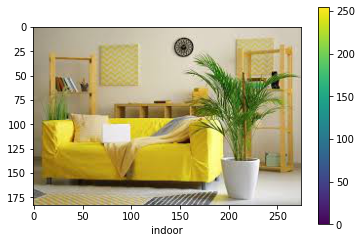

In [274]:
plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.xlabel(prediction_result)
plt.show()